In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data={
    'Machine':[1,2,3,4,5,6,7,8,9,10],
    'Speed':[100,105,95,110,102,97,103,99,107,104],
    'Temp':[60,63,57,65,61,58,62,59,64,60],
    'Vibration':[12,15,10,18,14,13,16,11,17,13],
    'Energy':[30,33,29,35,32,31,34,30,34,32],
    'Maintenance':[5,7,4,8,6,5,7,5,8,6]
}

In [ ]:
df = pd.DataFrame(data)
df

,Machine,Speed,Temp,Vibration,Energy,Maintenance
0,1,100,60,12,30,5
1,2,105,63,15,33,7
2,3,95,57,10,29,4
3,4,110,65,18,35,8
4,5,102,61,14,32,6
5,6,97,58,13,31,5
6,7,103,62,16,34,7
7,8,99,59,11,30,5
8,9,107,64,17,34,8
9,10,104,60,13,32,6


In [ ]:
X = df.drop(columns=['Machine'])
X

,Speed,Temp,Vibration,Energy,Maintenance
0,100,60,12,30,5
1,105,63,15,33,7
2,95,57,10,29,4
3,110,65,18,35,8
4,102,61,14,32,6
5,97,58,13,31,5
6,103,62,16,34,7
7,99,59,11,30,5
8,107,64,17,34,8
9,104,60,13,32,6


(a) Standardizing the dataset

In [ ]:
standardized_data = (X - np.mean(X, axis=0))/np.std(X, axis=0) #X-mu/Sigma
standardized_data

,Speed,Temp,Vibration,Energy,Maintenance
0,-0.505247,-0.364698,-0.769919,-1.054093,-0.846154
1,0.643041,0.850963,0.445742,0.527046,0.692308
2,-1.653535,-1.580360,-1.580360,-1.581139,-1.615385
3,1.791329,1.661404,1.661404,1.581139,1.461538
4,-0.045932,0.040522,0.040522,0.000000,-0.076923
5,-1.194220,-1.175139,-0.364698,-0.527046,-0.846154
6,0.183726,0.445742,0.850963,1.054093,0.692308
7,-0.734904,-0.769919,-1.175139,-1.054093,-0.846154
8,1.102357,1.256183,1.256183,1.054093,1.461538
9,0.413384,-0.364698,-0.364698,0.000000,-0.076923


# (b) Finding Eigenvalues & EigenVectors using covariance matrix

In [ ]:
cov_mat = np.cov(standardized_data.T)
eigenvalues,eigenvectors = np.linalg.eigh(cov_mat)
ncols = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[ncols]
eigenvectors = eigenvectors[:,ncols]

In [ ]:
eigenvalues

array([5.31643359, 0.16289279, 0.04925749, 0.01853805, 0.00843364])

In [ ]:
eigenvectors

array([[-0.44049936, -0.61975354, -0.55291879,  0.29964982,  0.16234737],
       [-0.44699084, -0.38867379,  0.67850861,  0.02598579, -0.43368501],
       [-0.44697877,  0.48696831,  0.24207538,  0.56025081,  0.43656659],
       [-0.44698368,  0.475815  , -0.41674519, -0.10390493, -0.62396546],
       [-0.4545053 ,  0.03605817,  0.04037133, -0.76475978,  0.45347257]])

# (c) Calculating explained Variance

In [ ]:
explained_variance_each = eigenvalues/np.sum(eigenvalues)
explained_variance_each

array([0.95695805, 0.0293207 , 0.00886635, 0.00333685, 0.00151806])

# (d) Reducing Dataset to 2 components

In [ ]:
n_components = 2
top_vectors = eigenvectors[:,:n_components]
top_vectors

array([[-0.44049936, -0.61975354],
       [-0.44699084, -0.38867379],
       [-0.44697877,  0.48696831],
       [-0.44698368,  0.475815  ],
       [-0.4545053 ,  0.03605817]])

# (e) Calculating the results by taking dot product



In [ ]:
pca = np.dot(standardized_data,top_vectors)
pca.shape

(10, 2)

- According to the eigenvectors value, we have highest value as 0.299 and 0.162 which means that **Energy** and **Maintenance** have the highest possible contribution for PC1.
- Similarly, for PC2, highest positive values are 0.67 and 0.02 which means **Vibration** and **Energy** variables have the highest possible contribution for PC2.

In [ ]:
pca_cov = np.cov(pca, rowvar=False)
pca_cov

array([[ 5.31643359e+00, -1.91362554e-16],
       [-1.91362554e-16,  1.62892790e-01]])

In [ ]:
ev_pca,_ = np.linalg.eigh(pca_cov)

idx = np.argsort(ev_pca)[::-1]
ev_pca = ev_pca[idx]

In [ ]:
explained_variance_pca = ev_pca/np.sum(ev_pca)
explained_variance_pca

array([0.97027138, 0.02972862])

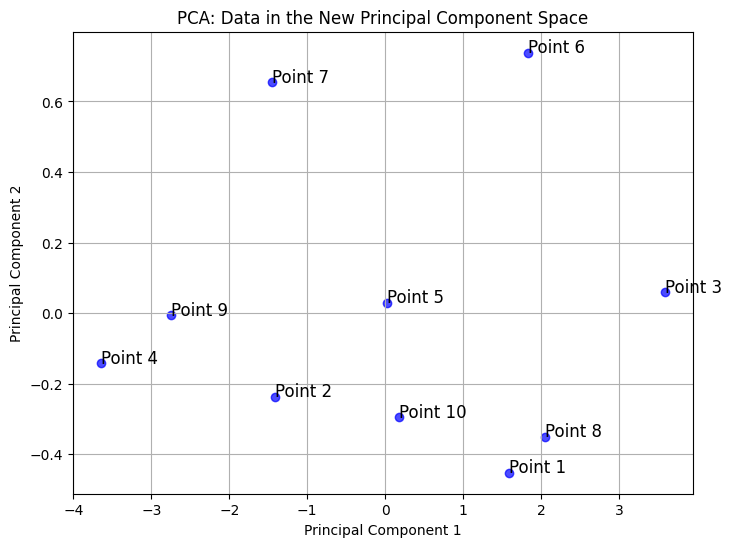

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], color='b', alpha=0.7, label='Data points')

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], f'Point {i+1}', fontsize=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data in the New Principal Component Space')
plt.grid(True)
plt.show()